In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 블로그
https://kaggle-kr.tistory.com/17?category=868316
---
## 유튜브
https://www.youtube.com/playlist?list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF
---
## 프로세스 정리
https://docs.google.com/document/d/16-MdOAPCYQTfIzN4Jq62HHWuAxqynqMRsBIiKIYmCx8/edit?usp=sharing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 항상 이 두 줄 쓰고 시작.
plt.style.use('seaborn-v0_8-pastel') # matplotlib의 기본 테마 말고 seaborn 테마 사용
sns.set(font_scale=2.5) # 일일히 fontsize지정할 필요 없이 seaborn의 font_scale로 한번에.

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

# 1.1 Null data check

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print("안녕하세요 제 이름은 {:>10}입니다.".format("종현"))

안녕하세요 제 이름은         종현입니다.


In [8]:
for col in df_train.columns:
    print(df_train[col].isna().sum())

0
0
0
0
0
177
0
0
0
0
687
2


In [9]:
for col in df_train.columns:
    print('열이름: {:>15}\t | 결측치 개수:{:>5}\t | 비율:{:>10.2f}%'.format(col,df_train[col].isna().sum(),100*(df_train[col].isna().sum())/(df_train[col].shape[0])))

열이름:     PassengerId	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:        Survived	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Pclass	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Name	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Sex	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Age	 | 결측치 개수:  177	 | 비율:     19.87%
열이름:           SibSp	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Parch	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Ticket	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Fare	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Cabin	 | 결측치 개수:  687	 | 비율:     77.10%
열이름:        Embarked	 | 결측치 개수:    2	 | 비율:      0.22%


In [10]:
for col in df_test.columns:
    print('열이름: {:>15}\t | 결측치 개수:{:>5}\t | 비율:{:>10.2f}%'.format(col,df_test[col].isna().sum(),100*(df_test[col].isna().sum())/(df_test[col].shape[0])))

열이름:     PassengerId	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Pclass	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Name	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Sex	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Age	 | 결측치 개수:   86	 | 비율:     20.57%
열이름:           SibSp	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Parch	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Ticket	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Fare	 | 결측치 개수:    1	 | 비율:      0.24%
열이름:           Cabin	 | 결측치 개수:  327	 | 비율:     78.23%
열이름:        Embarked	 | 결측치 개수:    0	 | 비율:      0.00%


<Axes: >

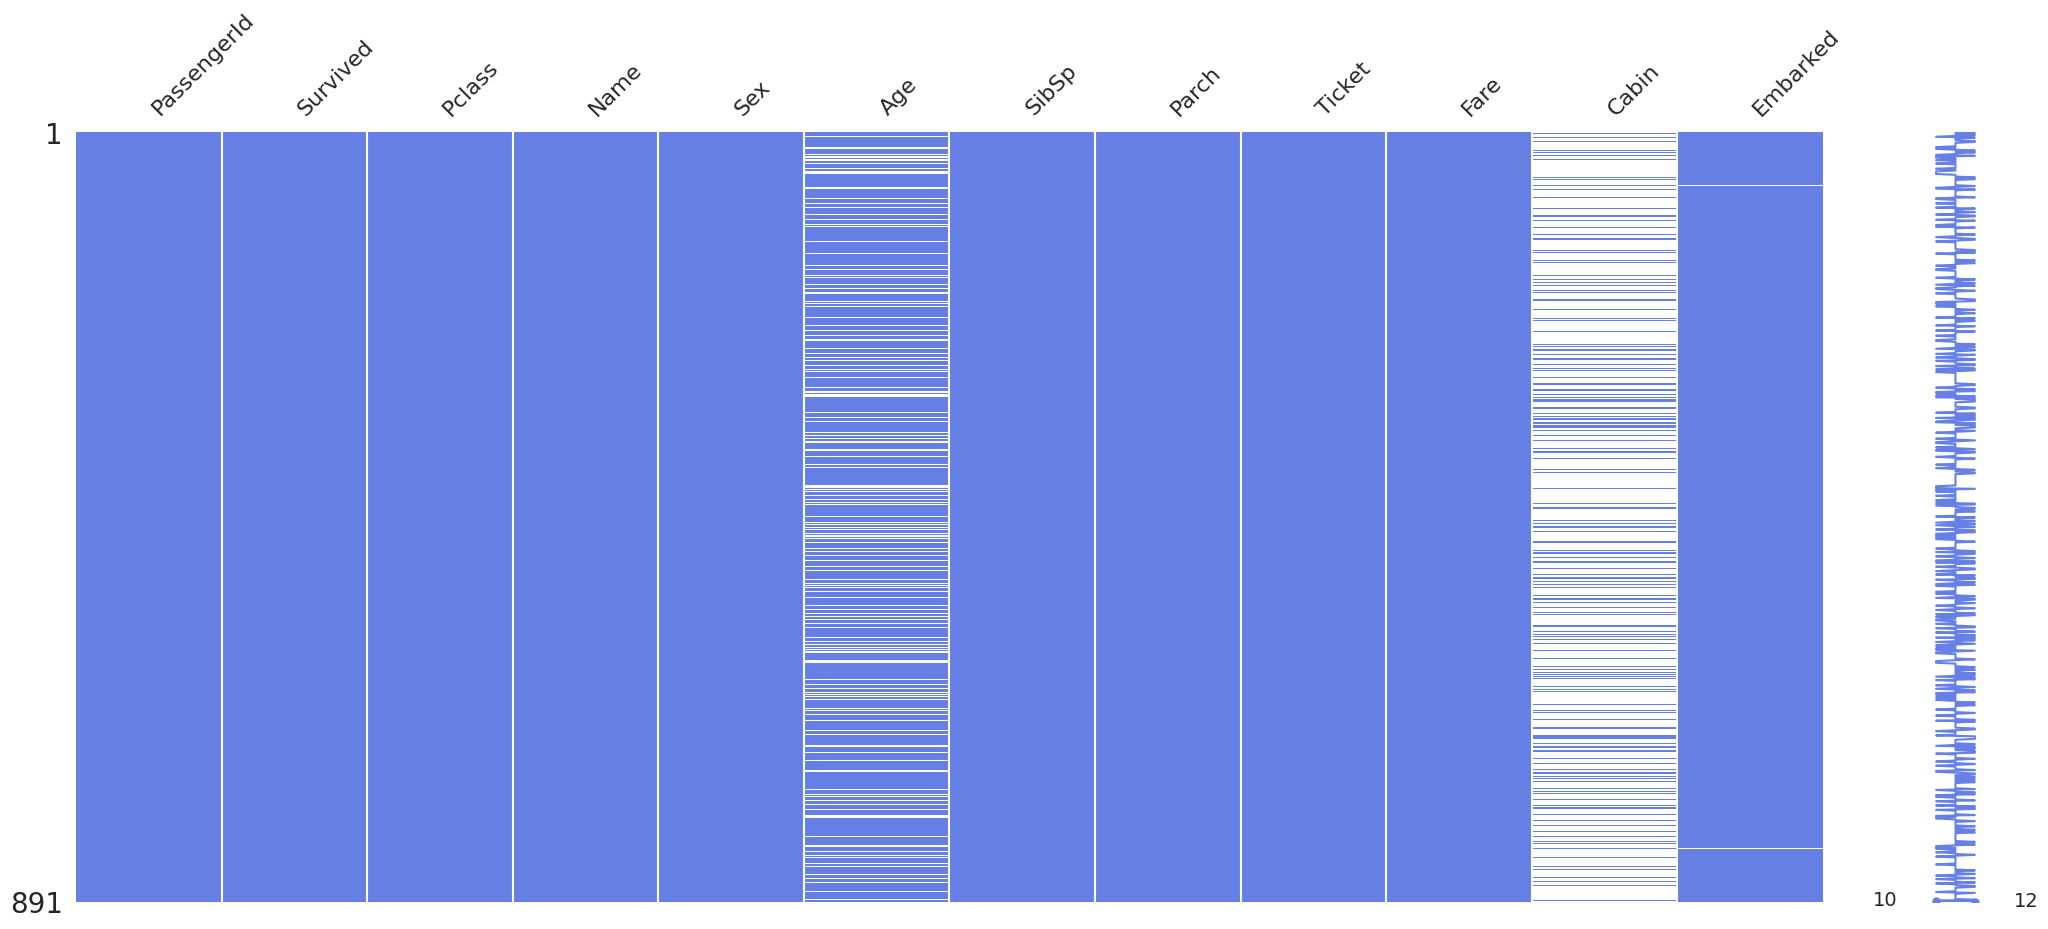

In [11]:
msno.matrix(df=df_train.iloc[:,:],color=(0.4,0.5,0.9))

<Axes: >

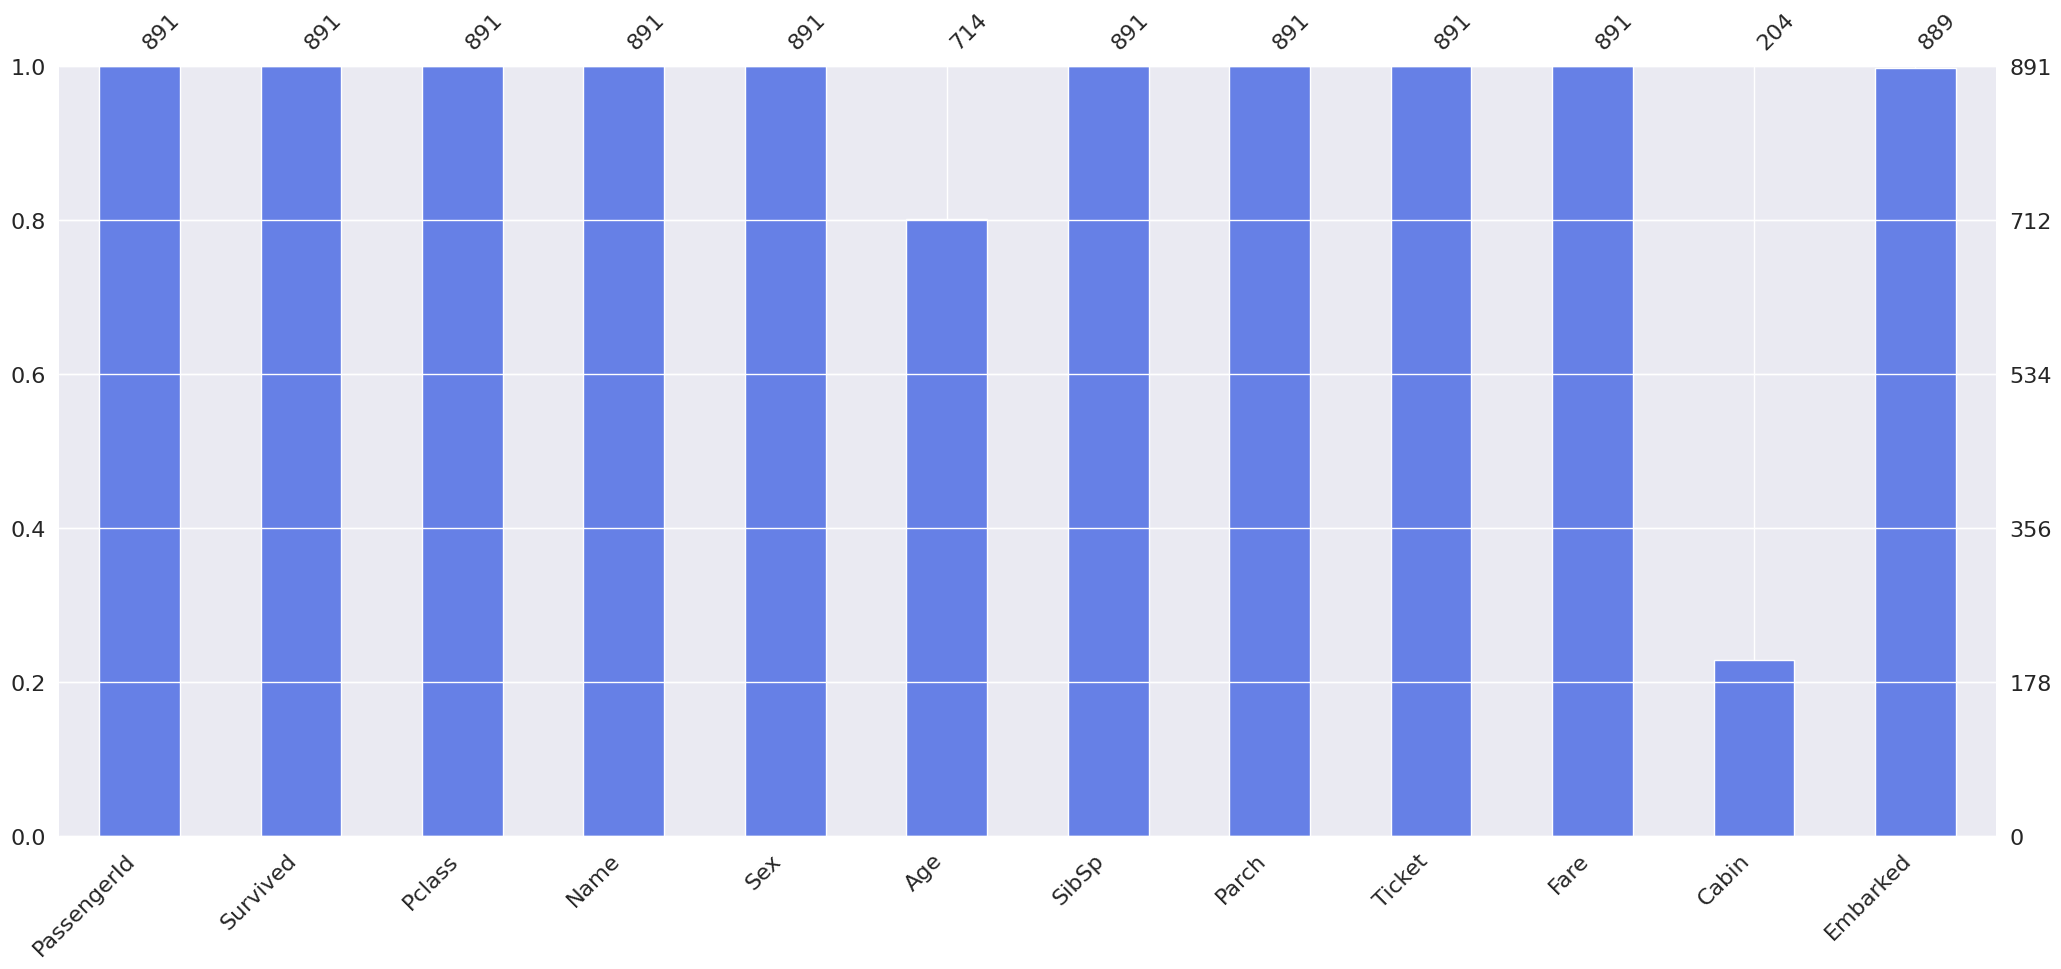

In [12]:
msno.bar(df=df_train.iloc[:,:],color=(0.4,0.5,0.9))

<Axes: >

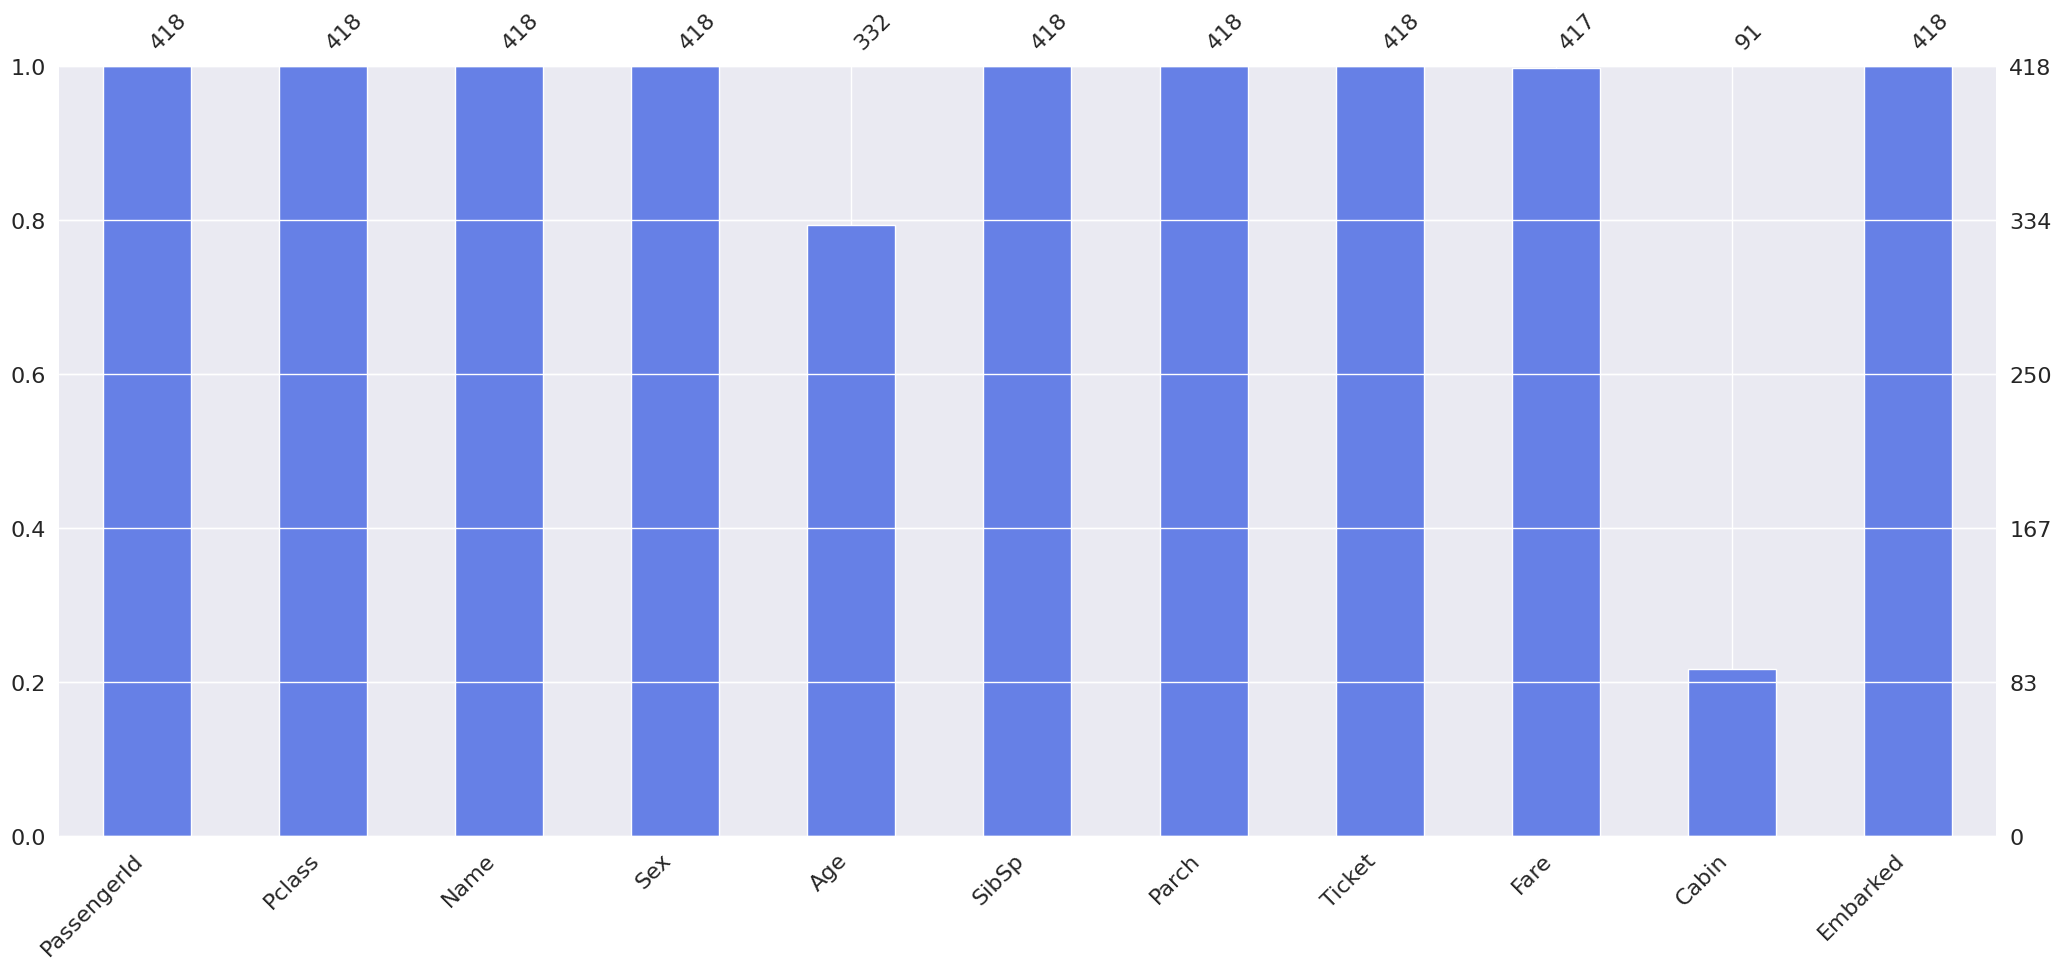

In [13]:
msno.bar(df=df_test.iloc[:,:],color=(0.4,0.5,0.9))

---

# 1.2 Target Label 확인
- target lavel의 distribution을 확인해봐야함.
- binary classification 문제에서, 0과 1의 비율이 극단적인지를 확인해봐야함.

Figure(640x480)
[<Axes: > <Axes: >]


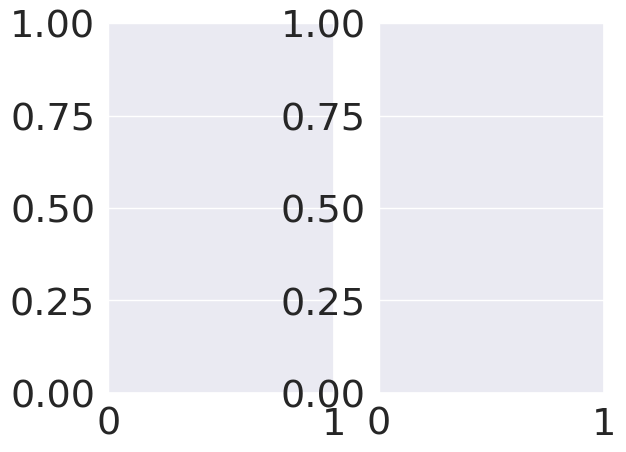

In [14]:
fig, ax = plt.subplots(1,2)
print(fig)
print(ax)

In [15]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff1c0f5f1d0>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.42826367051652175, -1.1209773541493675, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.249820474467971, -0.6539034565871309, '38.4%')])

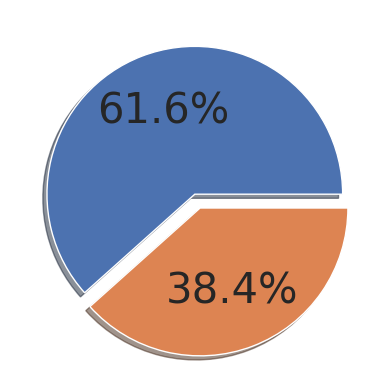

In [16]:
plt.pie(df_train['Survived'].value_counts(),autopct='%.1f%%',explode=[0,0.1],shadow=True)

<Axes: xlabel='Survived', ylabel='count'>

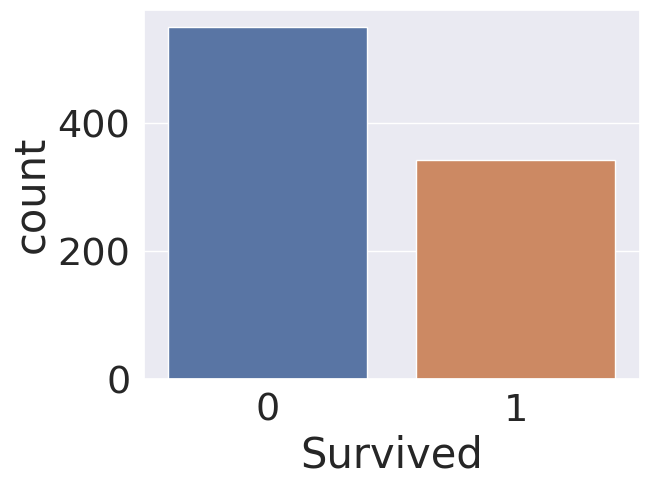

In [17]:
sns.countplot(data=df_train,x='Survived')

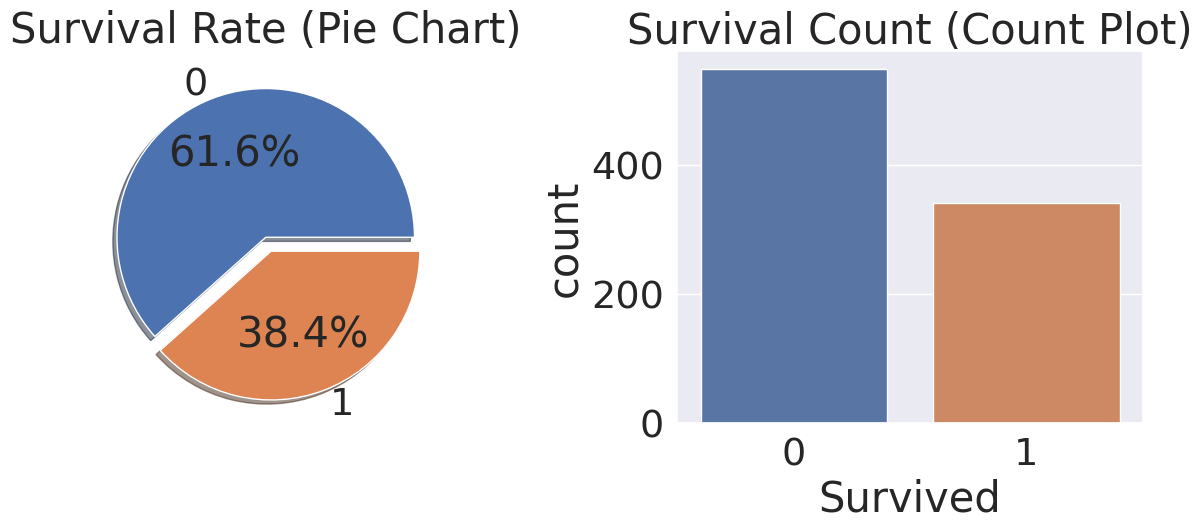

In [18]:
# 1행 2열의 서브플롯(그래프를 그릴 공간)을 생성합니다.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 서브플롯 (ax[0])에 파이 차트를 그립니다.
ax[0].pie(
    df_train['Survived'].value_counts(), # 데이터
    autopct='%.1f%%',                  # 백분율 표시 (소수점 첫째 자리까지)
    explode=[0, 0.1],                  # 특정 조각을 튀어나오게 함
    shadow=True,                       # 그림자 효과
    labels=df_train['Survived'].value_counts().index # 각 조각의 라벨
)
ax[0].set_title('Survival Rate (Pie Chart)')


# 두 번째 서브플롯 (ax[1])에 카운트 플롯을 그립니다.
sns.countplot(
    data=df_train, # 사용할 데이터프레임
    x='Survived',  # x축으로 사용할 컬럼
    ax=ax[1]       # 그림을 그릴 위치 지정
)
ax[1].set_title('Survival Count (Count Plot)')

# 그래프들의 레이아웃을 자동으로 조정해줍니다.
plt.tight_layout()

# 그래프를 화면에 보여줍니다.
plt.show()

---

# 2. Exploratory Data Analysis
- 데이터는 매우 많다.
- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.1 Pclass
- pclass   /	Ticket class   /	1 = 1st, 2 = 2nd, 3 = 3rd
- pclass에 따른 생존율의 차이를 알아보자.

In [20]:
df_train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='Pclass'>

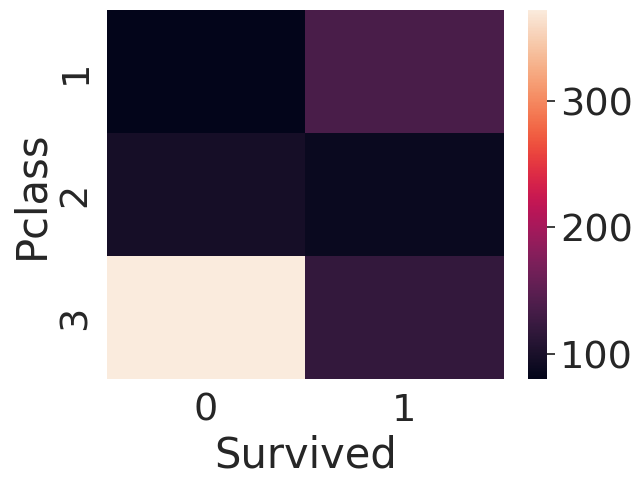

In [23]:
df_crosstab = pd.crosstab(df_train['Pclass'],df_train['Survived'])
sns.heatmap(df_crosstab)

<BarContainer object of 3 artists>

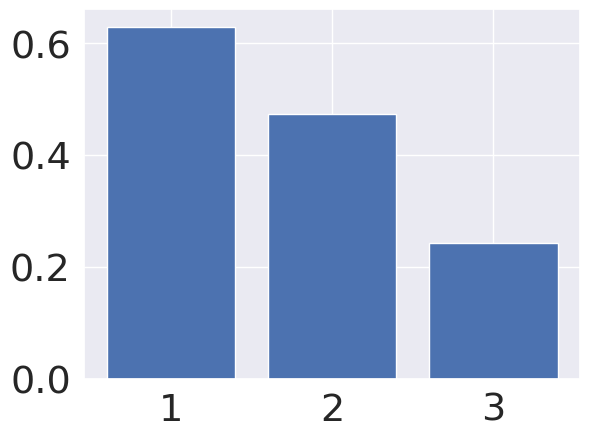

In [24]:
plt.bar(['1','2','3'],df_train.groupby(['Pclass'])['Survived'].mean())

<Axes: xlabel='Pclass'>

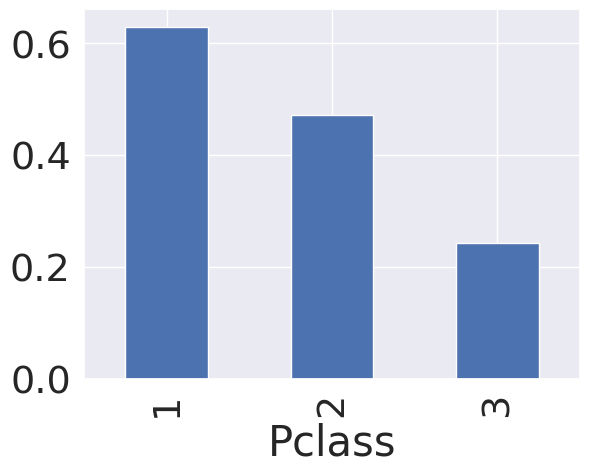

In [25]:
df_train.groupby('Pclass')['Survived'].mean().plot.bar()

<Axes: xlabel='Pclass', ylabel='count'>

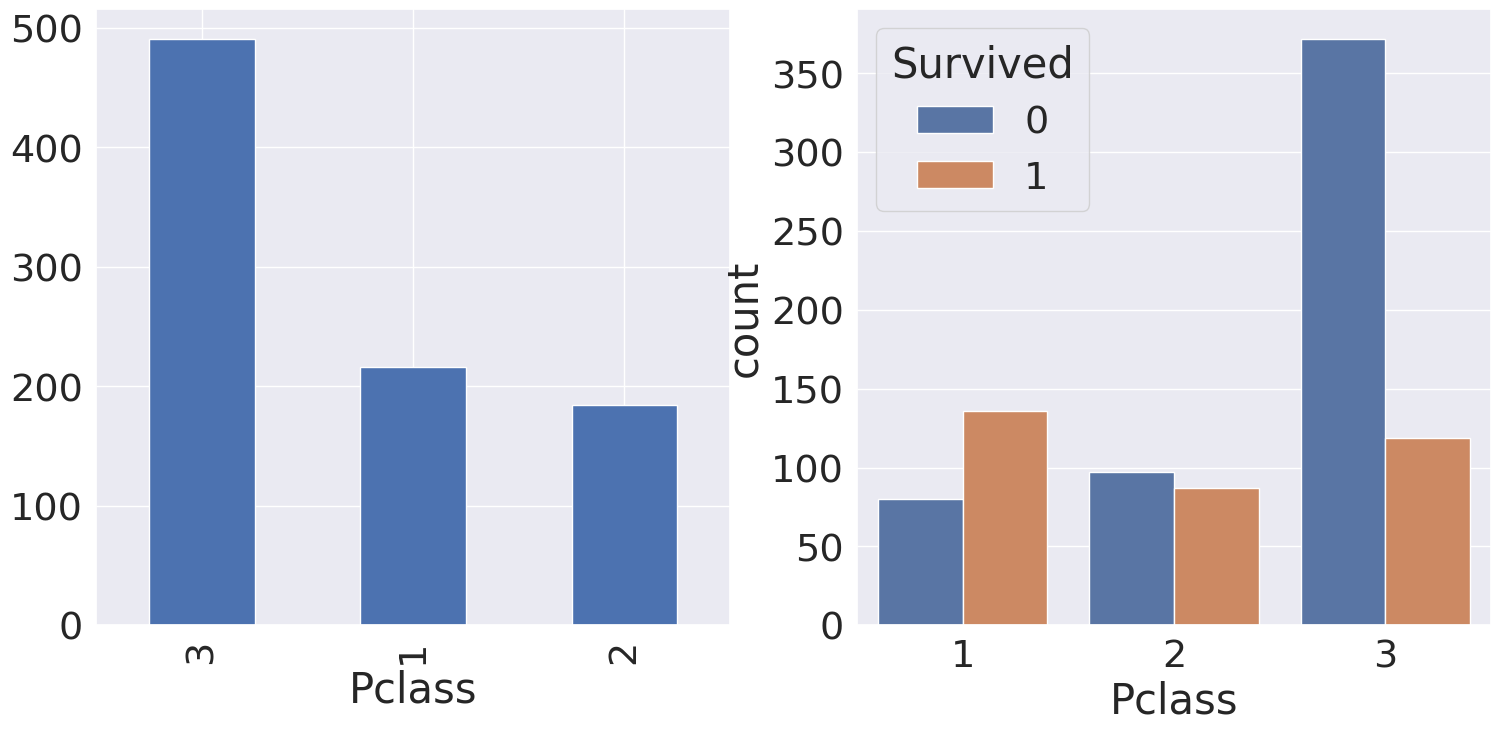

In [26]:
f,ax = plt.subplots(1,2,figsize=(18,8))
# 왼쪽엔 Pclass에 따른 승객 수
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])

# 오른쪽엔 Pclass에 따른 Survived, Dead 수
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])

In [27]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

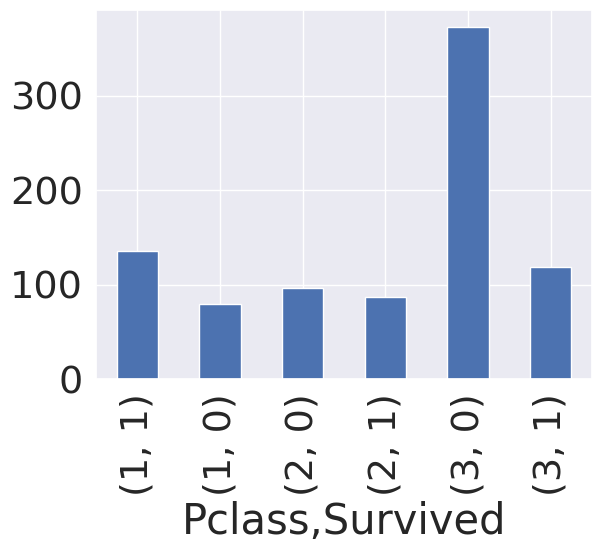

In [28]:
#Pclass에 따른 Survived, Dead 수
df_train.groupby('Pclass')['Survived'].value_counts().plot.bar()

<Axes: xlabel='Pclass', ylabel='count'>

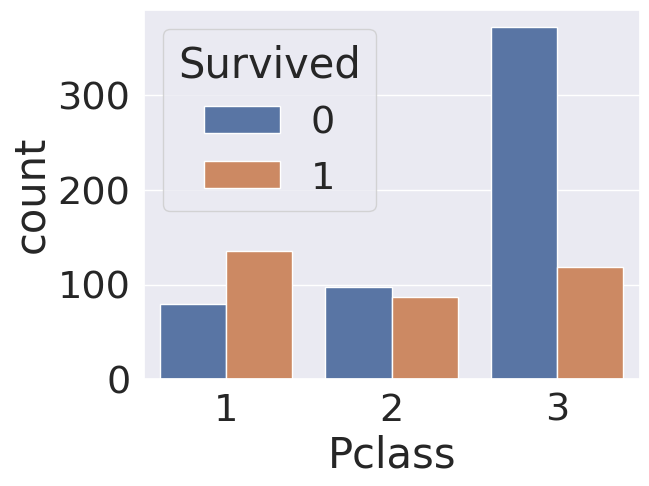

In [29]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

# 2.2 Sex
- 성별에 따른 생존율의 차이를 알아보자.

Text(0.5, 1.0, 'Sex: Survived vs Dead')

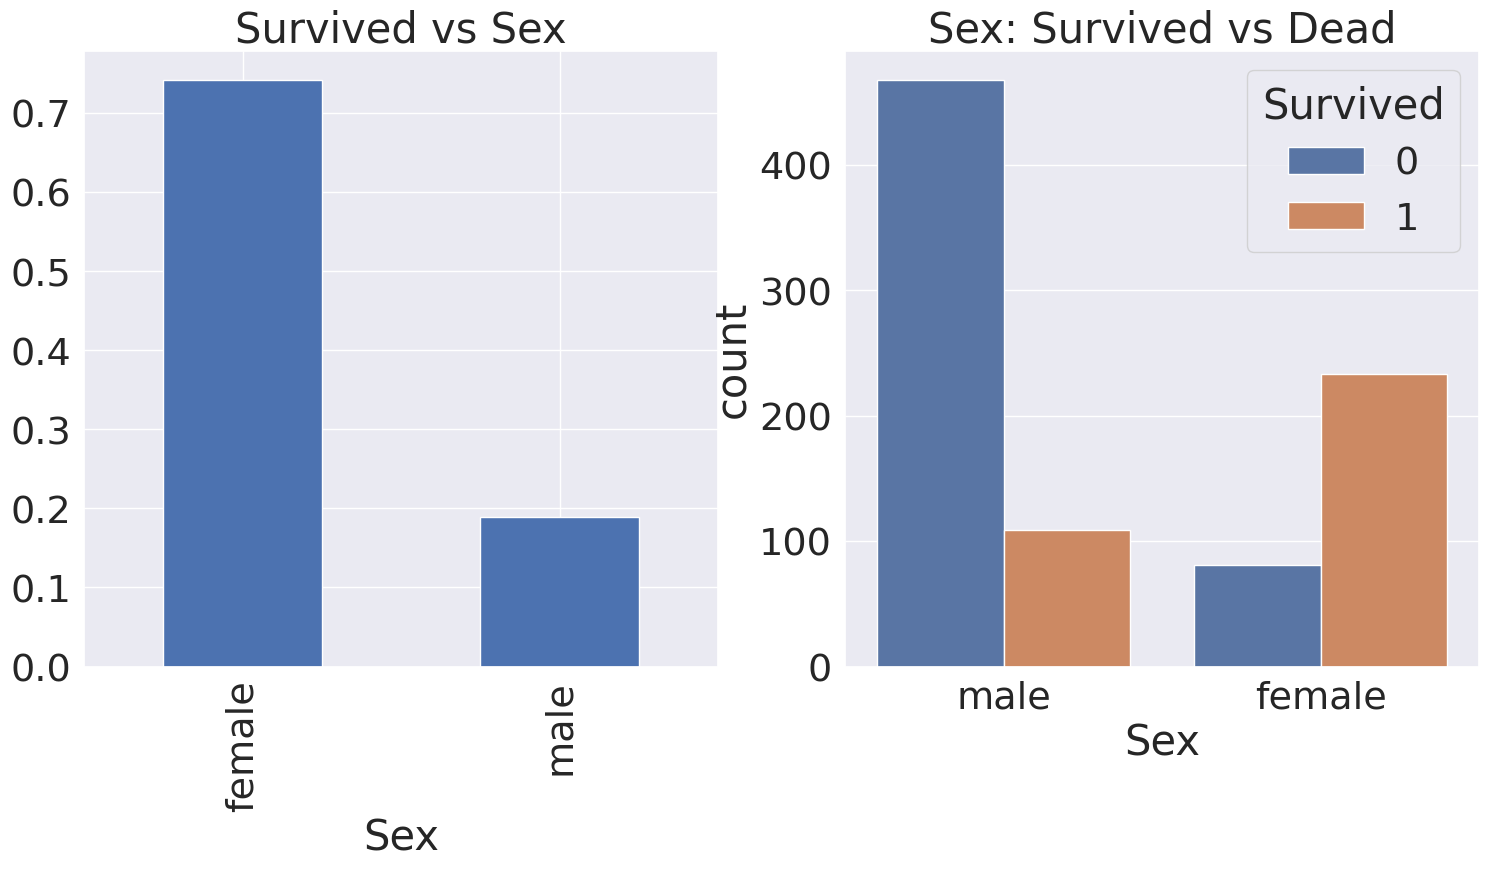

In [30]:
# 왼쪽에는 성별(x축)에 따른 생존율
# 오른쪽에는 성별에 따른 Survived, Dead 수 나누기
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train.groupby('Sex')['Survived'].mean().plot.bar(ax= ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue='Survived', data = df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex'>

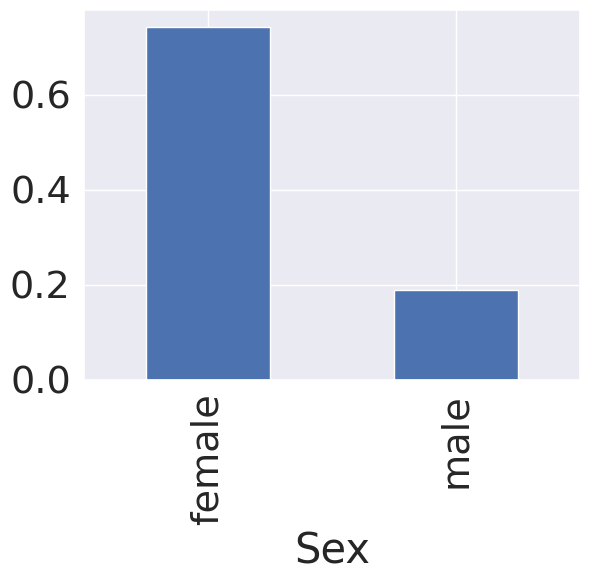

In [32]:
# 왼쪽에는 성별(x축)에 따른 생존율
df_train.groupby('Sex')['Survived'].mean().plot.bar()

<Axes: xlabel='Sex', ylabel='count'>

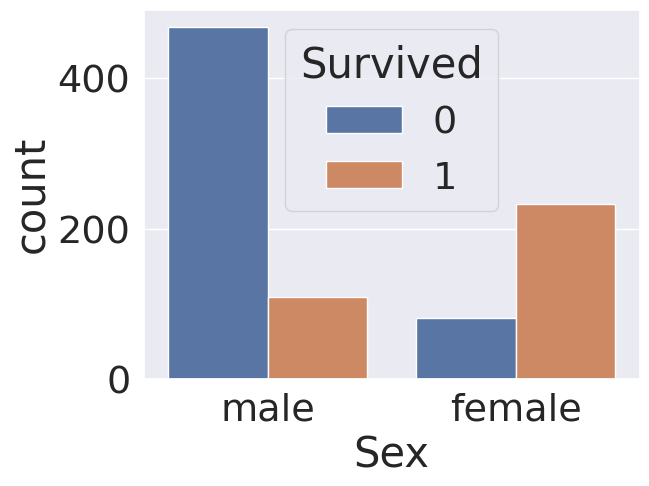

In [33]:
# 오른쪽에는 성별에 따른 Survived, Dead 수 나누기
sns.countplot(x= 'Sex', hue='Survived', data = df_train)

In [34]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.3 Both Sex and Pclass
- 성별과 Pclass에 따른 생존율의 차이를 알아보자.

In [35]:
df_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

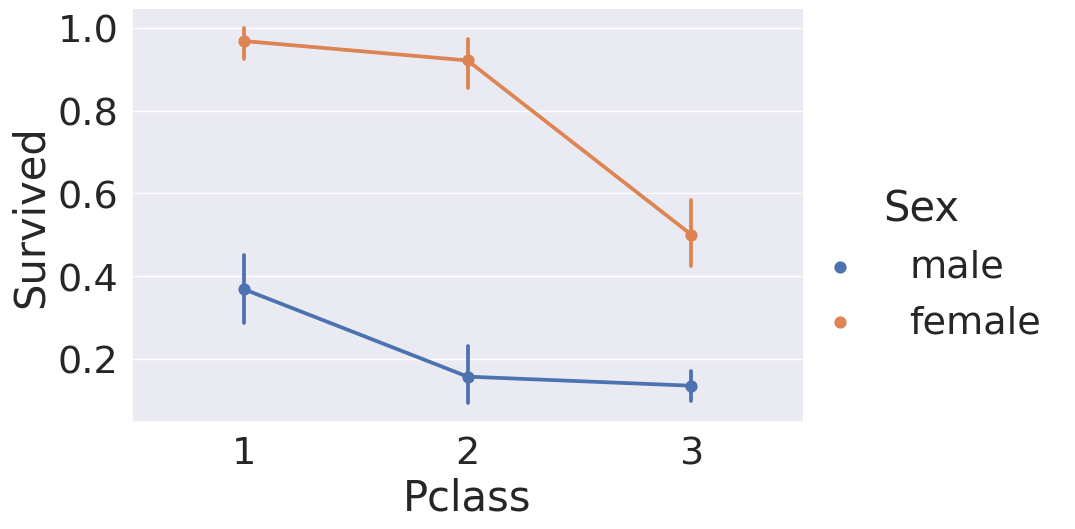

In [36]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

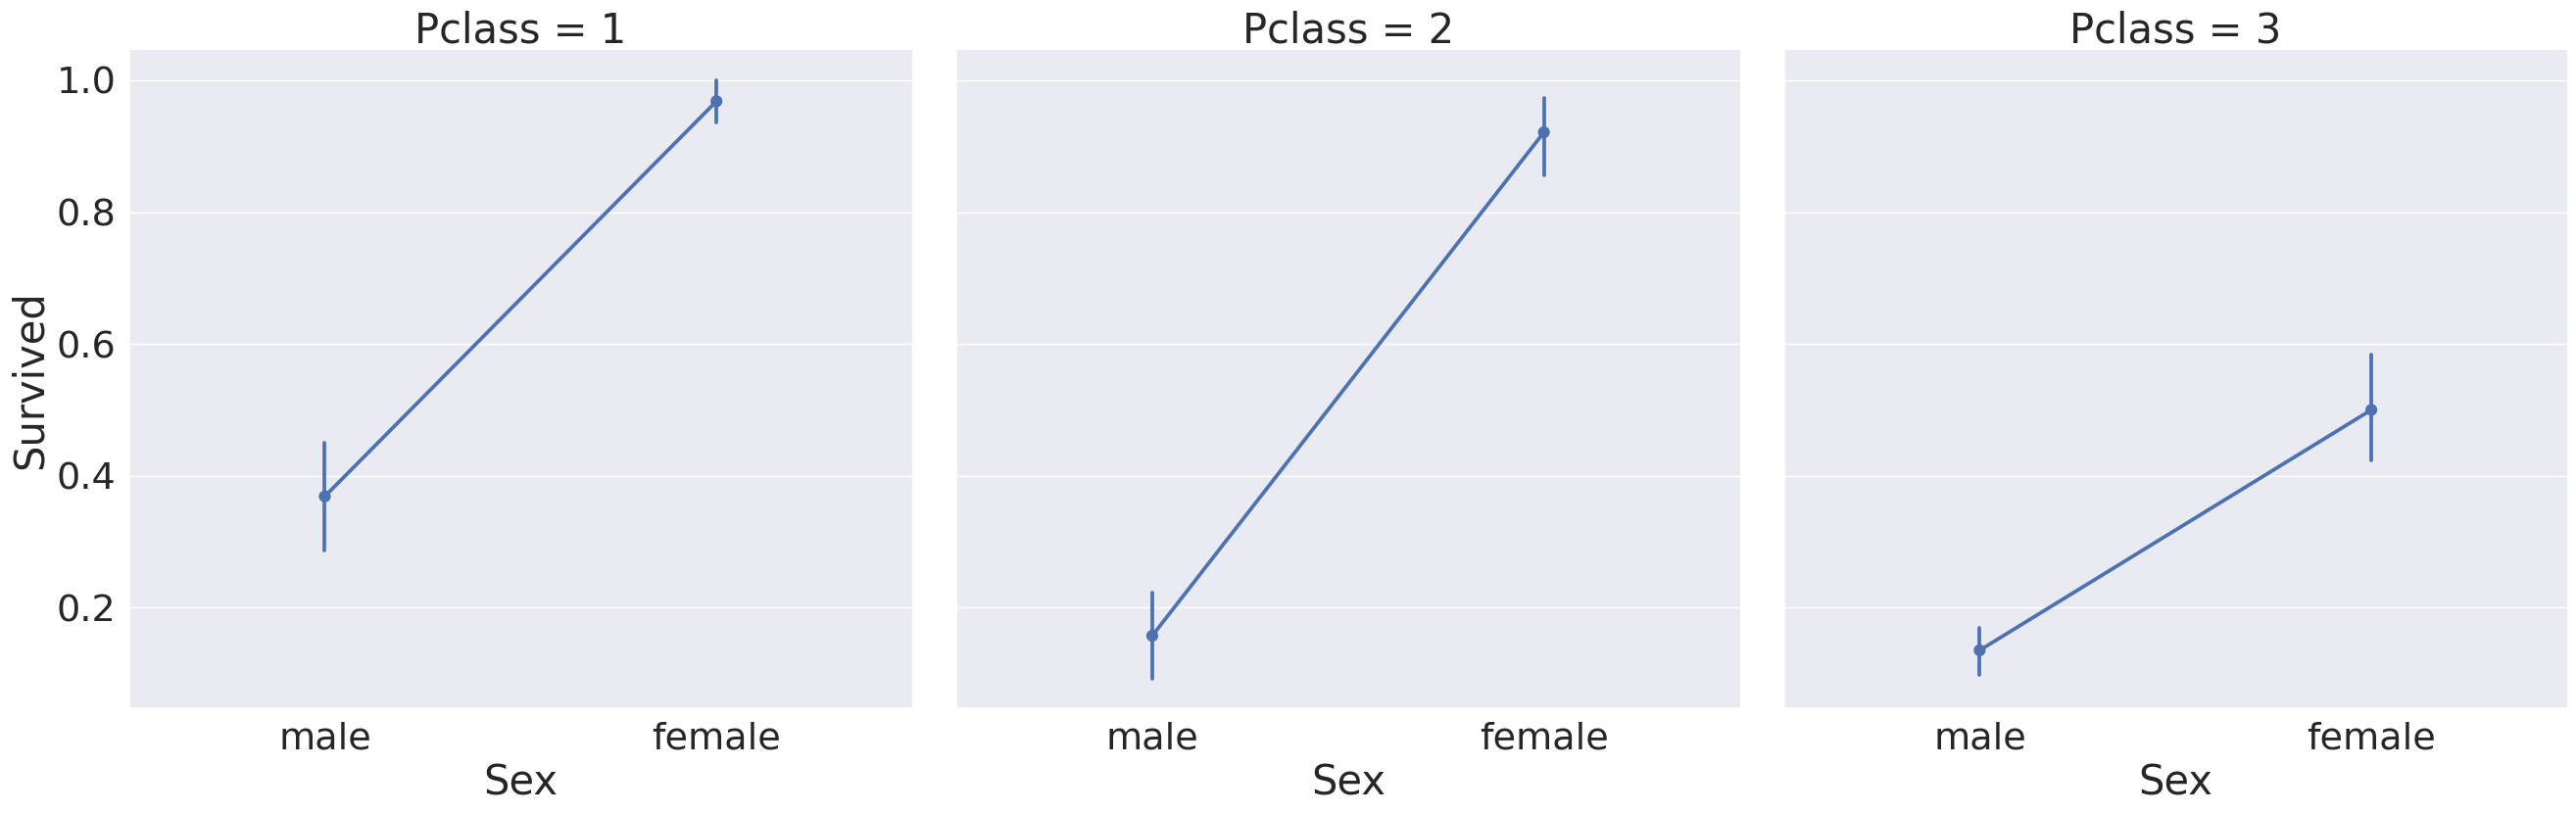

In [37]:
sns.catplot(x='Sex',y='Survived', col='Pclass', data=df_train, height=9, aspect=1, kind='point')

# 2.4 Age
- Age에 따른 생존율의 차이를 알아보자.

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# 나이 최댓값 최솟값 평균값 구하기

print("나이 최댓값: {}".format(df_train['Age'].max()))
print("나이 최솟값: {}".format(df_train['Age'].min()))
print("나이 평균값: {}".format(df_train['Age'].mean()))

나이 최댓값: 80.0
나이 최솟값: 0.42
나이 평균값: 29.69911764705882


<Axes: xlabel='Age', ylabel='Density'>

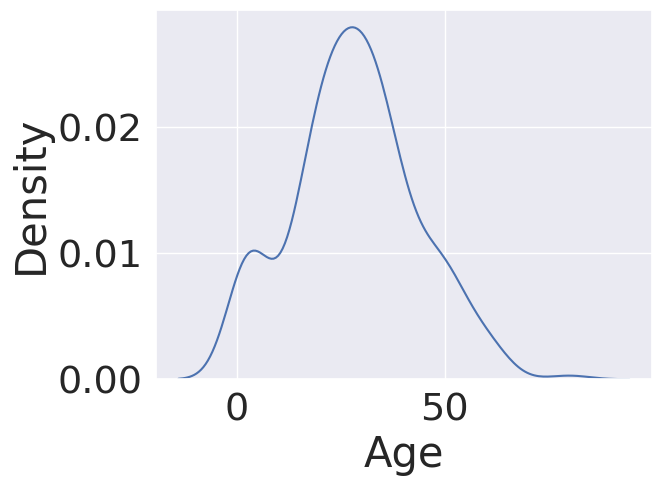

In [40]:
# 생존에 따른 age의 kde 확률밀도함수
# 살아남은 사람의 age kde 확률밀도함수
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])

<Axes: xlabel='Age', ylabel='Density'>

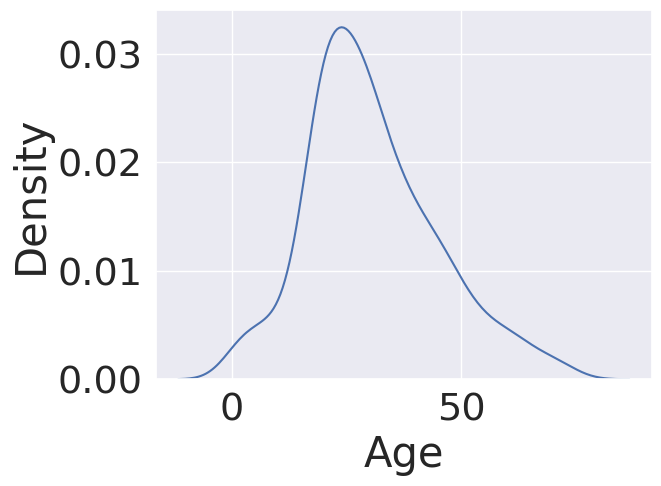

In [41]:
# 생존에 따른 age의 kde 확률밀도함수
# 죽은 사람의 age kde 확률밀도함수
sns.kdeplot(df_train[df_train['Survived']==0]['Age'])

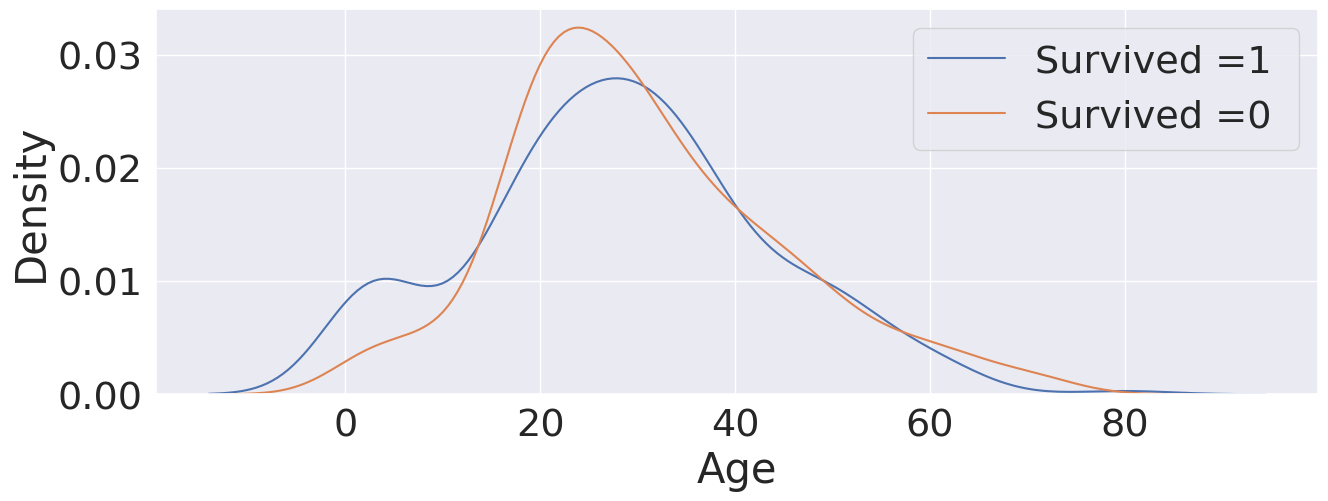

In [42]:
# 하나에 overlay
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived =1 ', 'Survived =0 '])
plt.show()

# 2.5 Pclass Sex Age 한번에

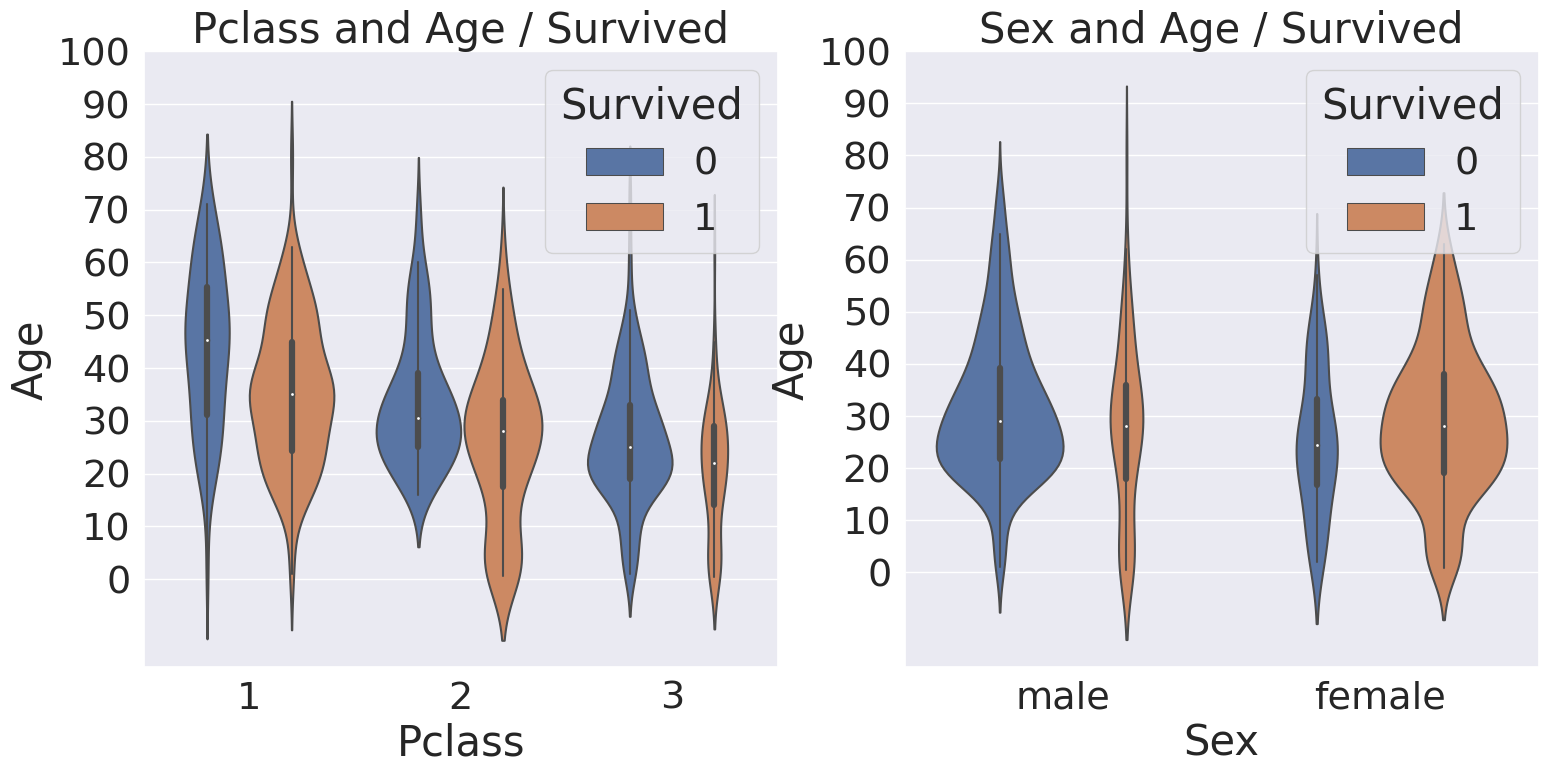

In [43]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 우선 Pclass 별로 Age기준 생존 확률밀도함수
sns.violinplot(x='Pclass',y='Age',data= df_train, hue='Survived',ax=ax[0],scale='count')
ax[0].set_yticks(range(0,110,10))
ax[0].set_title('Pclass and Age / Survived')

# 오른쪽엔 Sex 별로 Age기준 생존 확률밀도함수
sns.violinplot(x='Sex',y='Age',data=df_train, hue='Survived',ax=ax[1],scale='count')
ax[1].set_yticks(range(0,110,10))
ax[1].set_title('Sex and Age / Survived')

plt.show()

# 2.6 Embarked
- 탑승한 항구
- 탑승한 곳에 따른 생존률 보기

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Embarked'>

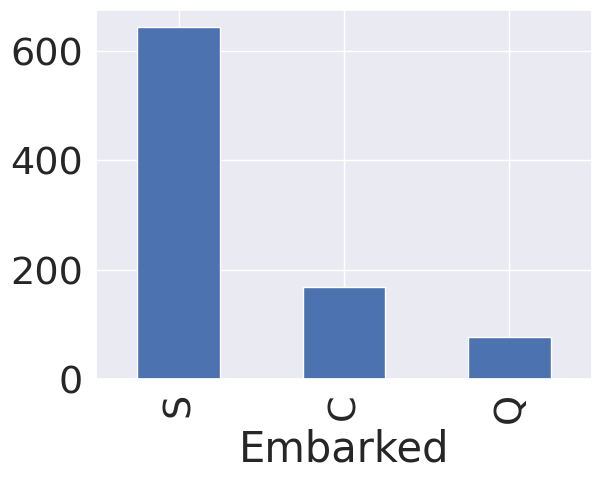

In [45]:
df_train['Embarked'].value_counts().plot.bar()

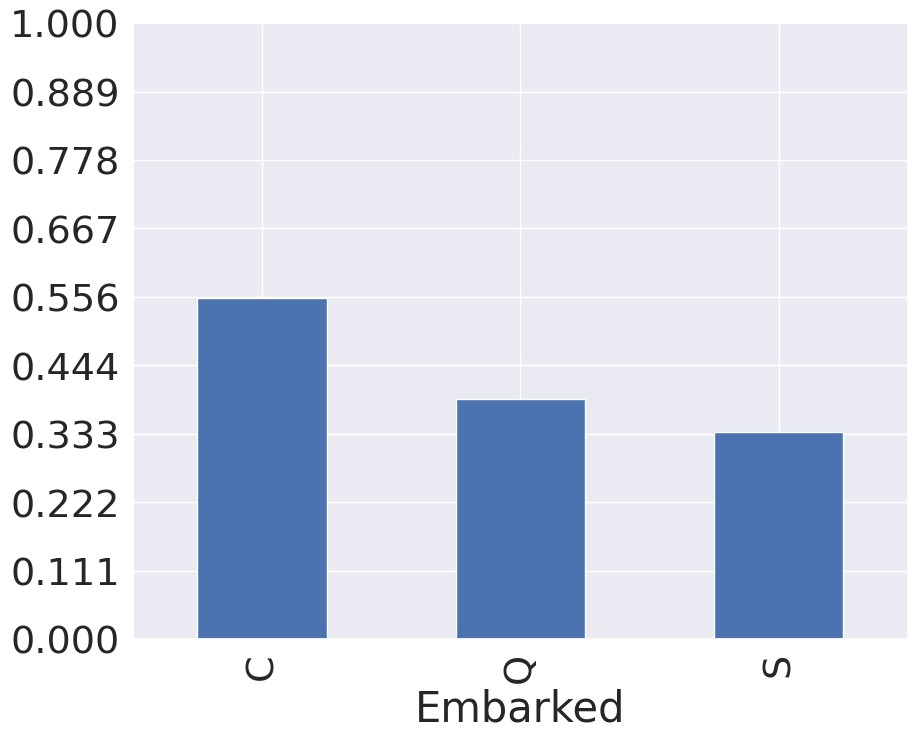

In [46]:
f, ax = plt.subplots(1,1,figsize=(10,8))
# 탑승 항구에 따른 생존률을 알아보자.

df_train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).plot.bar(ax= ax)
ax.set_yticks(np.linspace(0, 1, 10))

plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

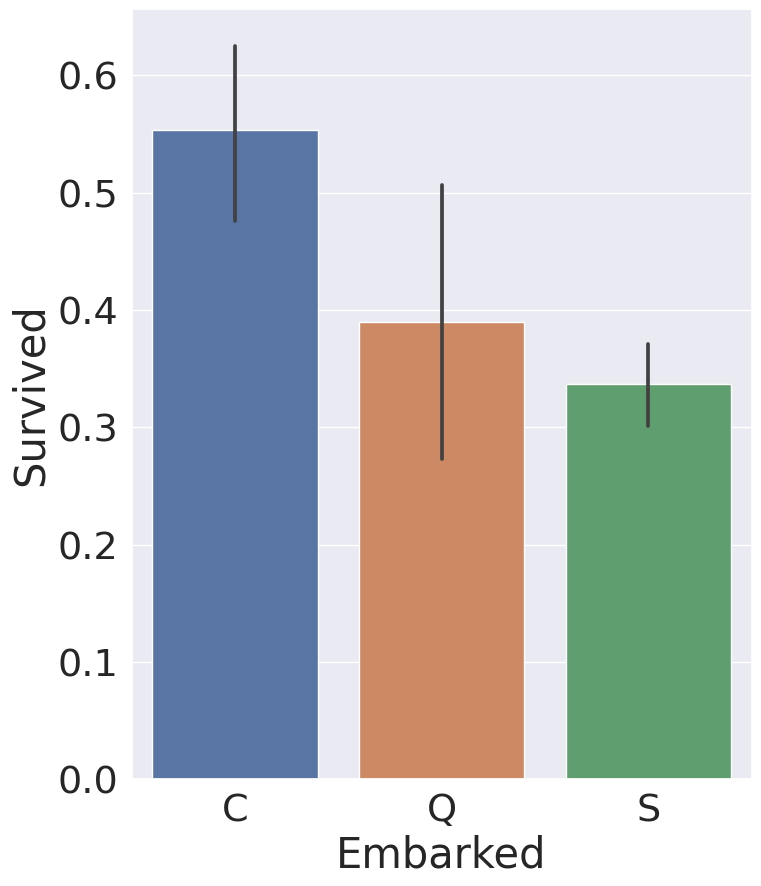

In [47]:
f, ax = plt.subplots(1,1,figsize=(8,10))
my_order = df_train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).index
sns.barplot(x = 'Embarked', y ='Survived', data=df_train, ax=ax, order=my_order)

`countplot`과 `barplot`의 차이는 **"Y축을 직접 계산하느냐, 아니면 Y축에 쓸 값을 내가 정해주느냐"**에 있습니다.

---

### 🎨 `sns.countplot`: 개수 세기 (Count)

`countplot`은 Y축이 **무조건 "개수(Count)"**로 고정됩니다.

내가 할 일은 X축에 **어떤 범주형 변수('Column')의 개수를 셀지** 알려주기만 하면 됩니다. `y`축은 지정할 필요가 없습니다 (지정하면 안 됩니다).

* **질문:** "각 항구(`Embarked`)**별 승객 수**는 몇 명이야?"
* **필요한 것:** `x='Embarked'`
* **코드:** `sns.countplot(x='Embarked', data=df_train)`
* **결과:** Y축에 'S' 항구 644명, 'C' 항구 168명... 처럼 **개수(count)**가 표시됩니다.



---

### 📊 `sns.barplot`: 평균 계산 (Bar)

`barplot`은 X축 범주(`x`)별로 Y축에 지정된 **숫자 변수(`y`)의 통계치(기본값: 평균)**를 계산하여 막대로 그립니다.

내가 할 일은 X축(`x`)과 Y축(`y`)을 **모두 지정**하는 것입니다.

* **질문:** "각 항구(`Embarked`)별 **평균 생존율**은 얼마야?"
* **필요한 것:** `x='Embarked'`, `y='Survived'`
* **코드:** `sns.barplot(x='Embarked', y='Survived', data=df_train)`
* **결과:** Y축에 'C' 항구 0.55(55%), 'Q' 항구 0.38(38%)... 처럼 `Survived` 열의 **평균(mean)**이 표시됩니다.



---

### 💡 바로 떠올리는 법 (핵심 요약)

* " ~별 인원수", "~별 승객 수"**처럼 **개수(Count)**가 궁금하다?
    * ➡️ **`countplot`** (X축만 지정)
* " ~별 평균", "~별 생존율", "~별 나이"**처럼 **평균값(Mean)**이 궁금하다?
    * ➡️ **`barplot`** (X축과 Y축 모두 지정)

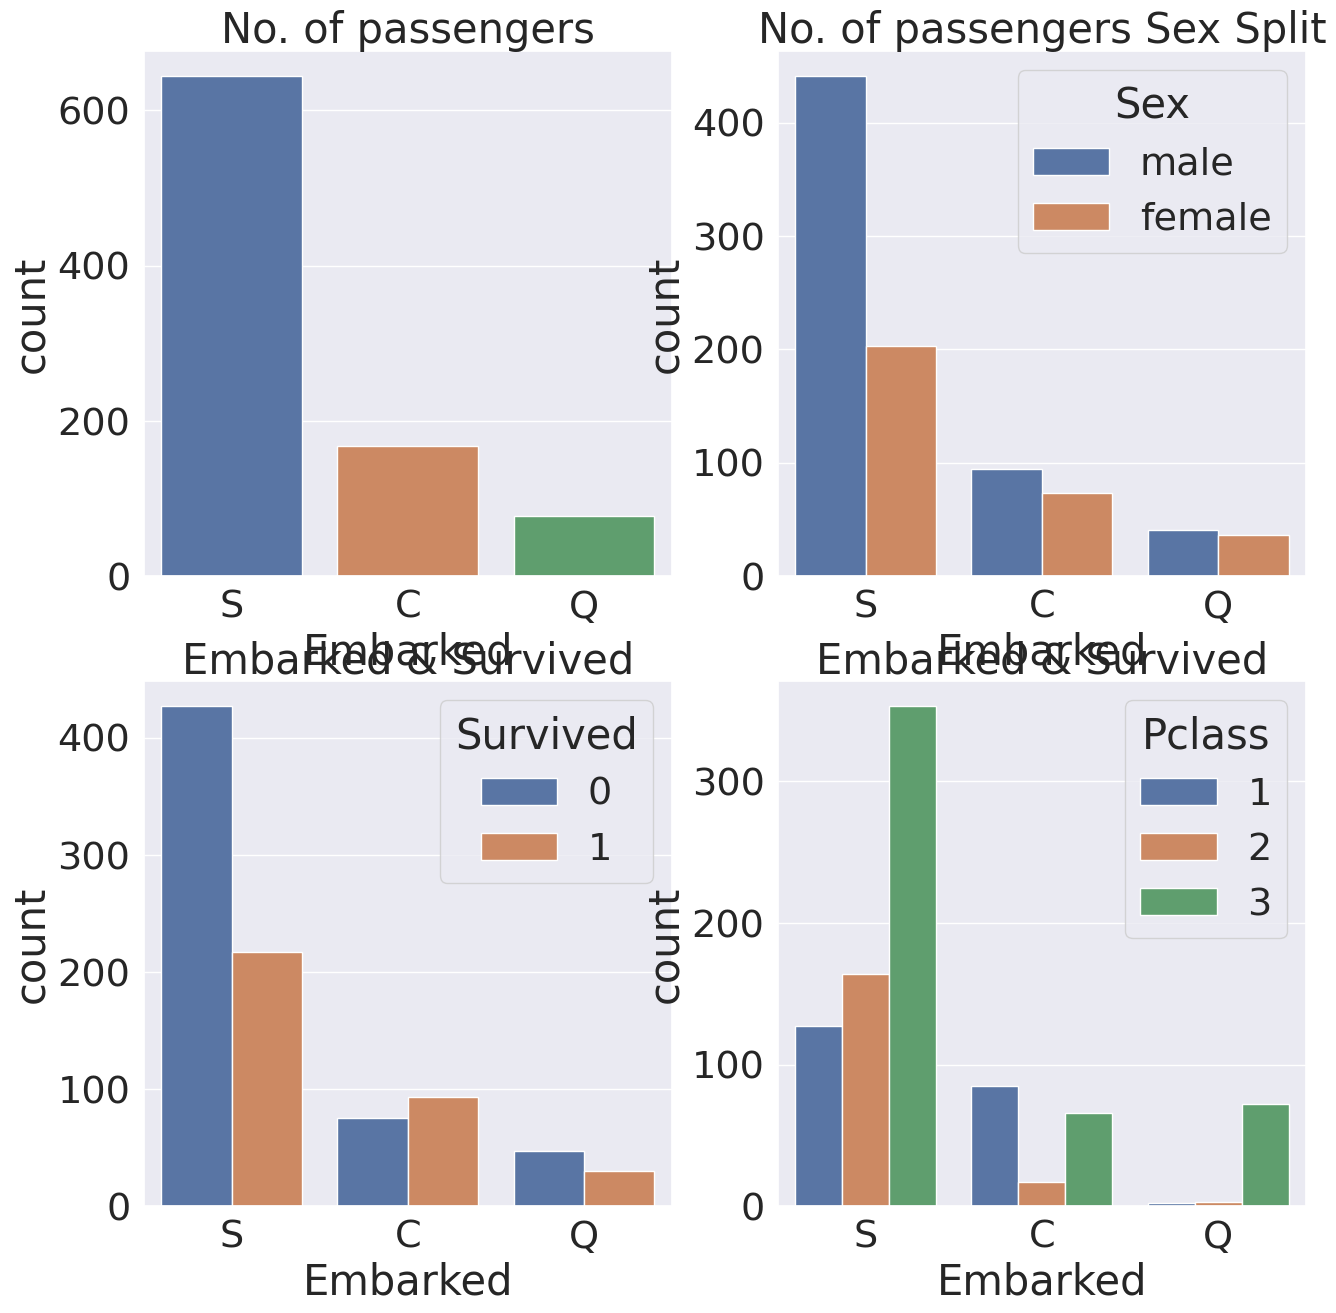

In [48]:
f, ax = plt.subplots(2,2,figsize=(15,15))

# 첫번째는 탑승 항구에 따른 승객 수 막대그래프
sns.countplot(ax=ax[0,0], data=df_train, x='Embarked')
ax[0,0].set_title('No. of passengers')

# 두번째는 첫번째를 sex 구분
sns.countplot(ax=ax[0,1],data=df_train,x='Embarked',hue='Sex')
ax[0,1].set_title('No. of passengers Sex Split')

# 세번째는 탑승 항구에 따른 생존자 구분
sns.countplot(ax=ax[1,0],data=df_train,x='Embarked',hue='Survived')
ax[1,0].set_title('Embarked & Survived')

# 네번째는 탑승 항구에 따른 Pclass 구분
sns.countplot(ax=ax[1,1],data=df_train,x='Embarked',hue='Pclass')
ax[1,1].set_title('Embarked & Survived')

plt.show()

💡 무엇이 잘못되었나? (사고 교정)
사용자님의 코드는 2번 방식으로 "일단 3개의 그룹으로 나눈 다음"(groupby), 그 나눠진 그룹 객체에 대고 1번 방식인 value_counts()를 실행하라고 한 것입니다.

value_counts()는 단일 열에 사용하는 함수인데, 그룹 객체에 사용하려 하니 의도대로 작동하지 않는 것입니다.

올바른 사고의 흐름:

질문: "'Embarked' 열에 'S', 'C', 'Q'가 각각 몇 개 있어?"

선택 1 (Best): "하나의 열(Embarked)에 대한 질문이네? -> value_counts() 써야지!"

df_train['Embarked'].value_counts()

선택 2 (groupby 사용): "데이터 전체를 Embarked 기준으로 묶은 다음(groupby), 각 그룹의 **크기(size)**를 재야지!"

df_train.groupby('Embarked').size()

In [49]:
# 잘못된 코드
df_train.groupby('Embarked').value_counts()

Embarked  PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin      
C         2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85            1
          53           1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)             female  49.0  1      0      PC 17572  76.7292  D33            1
          55           0         1       Ostby, Mr. Engelhart Cornelius                       male    65.0  0      1      113509    61.9792  B30            1
          97           0         1       Goldschmidt, Mr. George B                            male    71.0  0      0      PC 17754  34.6542  A5             1
          98           1         1       Greenfield, Mr. William Bertram                      male    23.0  0      1      PC 17759  63.3583  D10 D12        1
                                                         

In [50]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# 2.7 df에 새로운 열 Family = SibSp(형제자매) + Parch(부모,자녀) 만들기


In [51]:
family_train = df_train['SibSp']+df_train['Parch']+1
print(family_train.max())
print(family_train.min())
print(family_train.mean())

family_test = df_test['SibSp']+df_test['Parch']+1

11
1
1.904601571268238


In [52]:
df_train['FamilySize'] = family_train
df_test['FamilySize'] = family_test

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


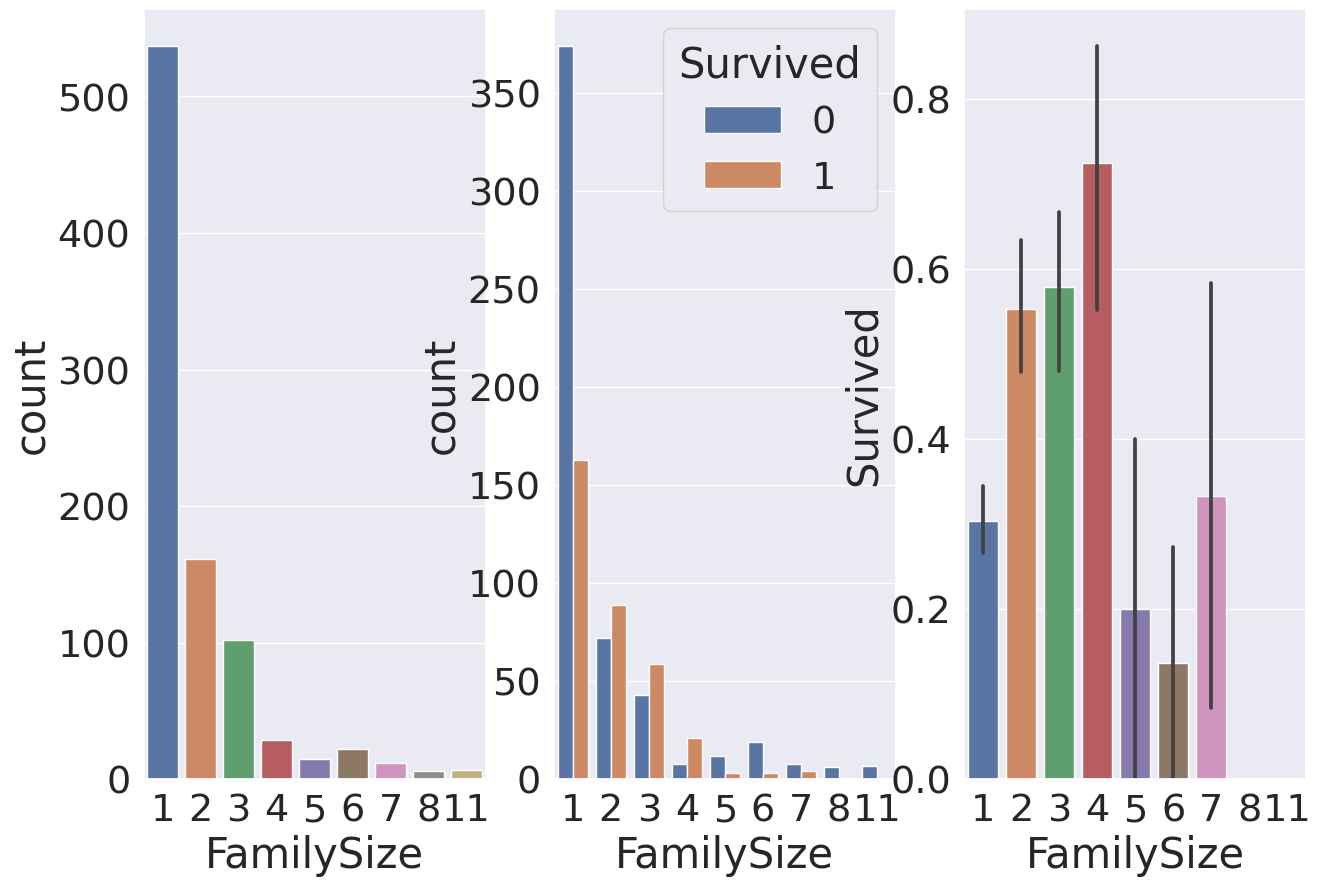

In [54]:
# familysize와 생존의 관계를 살펴보자.

f,ax = plt.subplots(1,3,figsize=(15,10))
sns.countplot(ax=ax[0],data=df_train,x="FamilySize")

# familysize에 따른 생존자, 사망자 "수"
sns.countplot(ax=ax[1],data=df_train,x='FamilySize',hue='Survived')

# familysize에 따른 생존 "비율"
sns.barplot(ax=ax[2],data=df_train,x='FamilySize',y='Survived')
plt.show()

**1. `f, ax = plt.subplots()` 습관 들이기**

**Why? (사용 이유)**
* Matplotlib의 표준이자 명시적인 방법입니다.
* `figsize` (도화지 크기)를 그리기 전에 미리 설정하기 편합니다.
* `ax`라는 변수로 특정 그래프를 제어하기 쉽습니다. (e.g., `ax.set_title()`, `ax.set_yticks()`)
* `subplots(1, 1)` -> `subplots(1, 2)`처럼 여러 개의 그래프로 확장하기 좋습니다.

**How (Single Plot) (단일 그래프 예시)**
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.barplot(data=df, x='Pclass', y='Survived', ax=ax)
    ax.set_title('My Title')
    plt.show()

**How (Multiple Plots) (다중 그래프 예시)**
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.countplot(data=df, x='Sex', ax=ax[0])
    sns.histplot(data=df, x='Age', ax=ax[1])
    ax[0].set_title('Graph 1')
    ax[1].set_title('Graph 2')
    plt.show()

---

**2. Seaborn 핵심: Countplot vs Barplot**

**`sns.countplot` (개수 세기)**
* Y축이 무조건 **"개수(Count)"**로 고정됩니다.
* **언제?**: *"~별 인원수"*, *"~별 승객 수"* 등 개수 자체가 궁금할 때 습니다.
* **어떻게?**: `x`축 (또는 `y`축)만 지정합니다. (y축은 지정 안 함!)
* *Example*: `sns.countplot(x='Embarked', data=df, ax=ax)`

**`sns.barplot` (평균/비율 계산)**
* Y축이 지정된 변수의 **"평균(Mean)"**을 *자동 계산*합니다.
* **언제?**: *"~별 평균 나이"*, *"~별 생존율"* (Survived의 평균 = 생존율) 등 비율이나 평균이 궁금할 때 씁니다.
* **어떻게?**: `x`축과 `y`축을 **모두** 지정합니다.
* *Example*: `sns.barplot(x='Embarked', y='Survived', data=df, ax=ax)`

---

**3. 그 외 자주 쓰는 Seaborn Plot**

* **`sns.histplot` / `sns.kdeplot`**: 숫자(연속형) 변수 *하나*의 **분포**를 볼 때 씁니다. (히스토그램 / 밀도 곡선)
* **`sns.boxplot` / `sns.violinplot`**: *범주별* 숫자 변수의 **분포를 비교**할 때 씁니다. (e.g., Pclass별 Age 분포)
* **`sns.scatterplot`**: 두 *숫자* 변수 간의 **관계**를 볼 때 씁니다. (산점도)
* **`sns.lineplot`**: *순서* (주로 시간)에 따른 **트렌드**를 볼 때 씁니다.
* **`sns.heatmap`**: 변수 간의 **상관관계** 매트릭스를 시각화할 때 씁니다.